In [70]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import math
import statistics as st




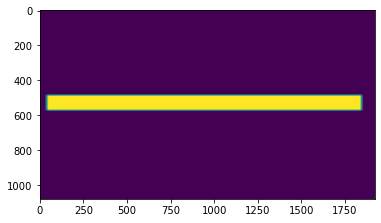

In [71]:
# マスク用単一色画像を作成
height = 100 # 生成画像の高さ
width = 100 # 生成画像の幅
imgMask = np.full((height, width, 1), 1, dtype=np.uint8)



# マスク範囲を四角形で描画
boxFromX = 2 #マスク範囲開始位置 X座標
boxFromY = 45 #マスク範囲開始位置 Y座標
boxToX = 95 #マスク範囲終了位置 X座標
boxToY = 52 #マスク範囲終了位置 Y座標
cv2.rectangle(imgMask, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

img_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", img_resize)
plt.imshow(img_resize)

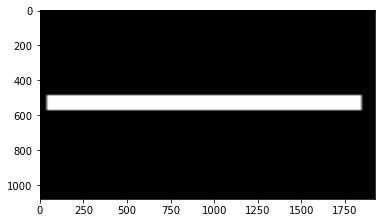

In [72]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

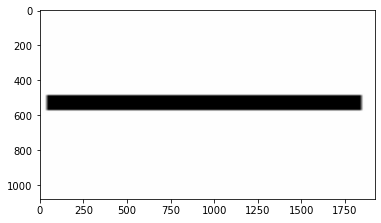

In [73]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

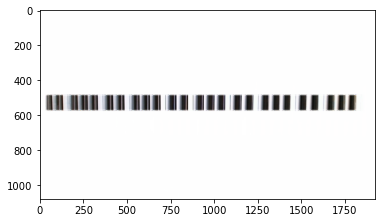

In [74]:
im_1 = cv2.imread('./imagefile/tryout/img_000.jpg', cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')

im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)

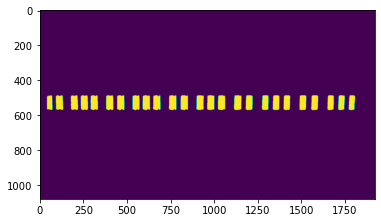

In [75]:
# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[1768  570]
 [1772  485]
 [1806  487]
 [1801  572]] 

1 外接矩形の座標
[[1707  570]
 [1711  485]
 [1747  487]
 [1743  572]] 

2 外接矩形の座標
[[1646  570]
 [1648  486]
 [1684  487]
 [1682  571]] 

3 外接矩形の座標
[[1553  570]
 [1556  485]
 [1594  487]
 [1591  571]] 

4 外接矩形の座標
[[1485  570]
 [1488  486]
 [1525  487]
 [1523  571]] 

5 外接矩形の座標
[[1395  570]
 [1397  486]
 [1433  487]
 [1431  571]] 

6 外接矩形の座標
[[1333  570]
 [1335  486]
 [1372  487]
 [1369  571]] 

7 外接矩形の座標
[[1271  569]
 [1273  486]
 [1310  487]
 [1307  570]] 

8 外接矩形の座標
[[1178  570]
 [1180  486]
 [1219  487]
 [1217  571]] 

9 外接矩形の座標
[[1111  570]
 [1113  486]
 [1154  487]
 [1152  571]] 

10 外接矩形の座標
[[1020  487]
 [1060  487]
 [1060  571]
 [1020  571]] 

11 外接矩形の座標
[[957 570]
 [958 486]
 [999 487]
 [997 571]] 

12 外接矩形の座標
[[895 570]
 [897 486]
 [938 487]
 [936 571]] 

13 外接矩形の座標
[[806 487]
 [847 487]
 [847 571]
 [806 571]] 

14 外接矩形の座標
[[739 487]
 [781 487]
 [781 571]
 [739 571]] 

15 外接矩形の座標
[[648 487]
 [690 487]
 [690 571]
 [648 57

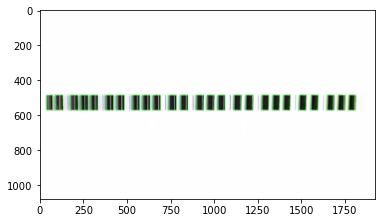

In [76]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 1000, contours))


xleft=[]
xright=[]

ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft +=[min(x)]
    xright+=[max(x)]

    ID+=1

In [77]:
print(xleft)

[1768, 1707, 1646, 1553, 1485, 1395, 1333, 1271, 1178, 1111, 1020, 957, 895, 806, 739, 648, 588, 530, 442, 379, 290, 234, 177, 89, 40]


In [78]:
print(xright)

[1806, 1747, 1684, 1594, 1525, 1433, 1372, 1310, 1219, 1154, 1060, 999, 938, 847, 781, 690, 630, 570, 483, 420, 331, 274, 217, 132, 71]


In [79]:
def bubble_sort(arr):
    change = True
    while change:
        change = False
        for i in range(len(arr) - 1):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                change = True
    return arr

In [80]:
xleft=bubble_sort(xleft)
xright=bubble_sort(xright)
print(xleft)
print(xright)

kokken=[[xleft[0],xright[0]]]
i=1
while i<len(xleft):
    kokken+=[[xleft[i],xright[i]]]
    i+=1


[40, 89, 177, 234, 290, 379, 442, 530, 588, 648, 739, 806, 895, 957, 1020, 1111, 1178, 1271, 1333, 1395, 1485, 1553, 1646, 1707, 1768]
[71, 132, 217, 274, 331, 420, 483, 570, 630, 690, 781, 847, 938, 999, 1060, 1154, 1219, 1310, 1372, 1433, 1525, 1594, 1684, 1747, 1806]


In [81]:
i=0
base=white_resize

while i<len(xleft):
    cv2.rectangle(base,
              (xleft[i], 675),
              (xright[i], 490),
              (0, 0, 0),
              thickness=1,
              lineType=cv2.LINE_4,
              shift=0)

    i+=1


In [82]:
#端っこを追加
xright=[0]+xright
xleft =xleft+[1920]

In [83]:
#白い部分の座標
hakkenkari=[[xright[0],xleft[0]]]
i=1
while i<len(xleft):
    hakkenkari+=[[xright[i],xleft[i]]]
    i+=1
print(hakkenkari)

[[0, 40], [71, 89], [132, 177], [217, 234], [274, 290], [331, 379], [420, 442], [483, 530], [570, 588], [630, 648], [690, 739], [781, 806], [847, 895], [938, 957], [999, 1020], [1060, 1111], [1154, 1178], [1219, 1271], [1310, 1333], [1372, 1395], [1433, 1485], [1525, 1553], [1594, 1646], [1684, 1707], [1747, 1768], [1806, 1920]]


In [84]:
mean=st.mean(xleft)-st.mean(xright)


In [85]:



#白鍵の正確な座標
i=0
j=0
hakken=[]
while i<len(hakkenkari):
    haklen=hakkenkari[i][1]-hakkenkari[i][0]
    if  haklen>mean:#別のところの値使いたい
        hakken+=[[hakkenkari[i][0],math.floor(hakkenkari[i][0]+haklen/2)]]+[[math.ceil(hakkenkari[i][0]+haklen/2),hakkenkari[i][1]]]
        
    else:
        hakken+=[[hakkenkari[i][0],hakkenkari[i][1]]]
    i+=1
print(hakken)

[[0, 20], [20, 40], [71, 89], [132, 154], [155, 177], [217, 234], [274, 290], [331, 355], [355, 379], [420, 442], [483, 506], [507, 530], [570, 588], [630, 648], [690, 714], [715, 739], [781, 806], [847, 871], [871, 895], [938, 957], [999, 1020], [1060, 1085], [1086, 1111], [1154, 1178], [1219, 1245], [1245, 1271], [1310, 1333], [1372, 1395], [1433, 1459], [1459, 1485], [1525, 1553], [1594, 1620], [1620, 1646], [1684, 1707], [1747, 1768], [1806, 1863], [1863, 1920]]


In [86]:
print(hakken)

[[0, 20], [20, 40], [71, 89], [132, 154], [155, 177], [217, 234], [274, 290], [331, 355], [355, 379], [420, 442], [483, 506], [507, 530], [570, 588], [630, 648], [690, 714], [715, 739], [781, 806], [847, 871], [871, 895], [938, 957], [999, 1020], [1060, 1085], [1086, 1111], [1154, 1178], [1219, 1245], [1245, 1271], [1310, 1333], [1372, 1395], [1433, 1459], [1459, 1485], [1525, 1553], [1594, 1620], [1620, 1646], [1684, 1707], [1747, 1768], [1806, 1863], [1863, 1920]]


In [87]:
print(kokken)

[[40, 71], [89, 132], [177, 217], [234, 274], [290, 331], [379, 420], [442, 483], [530, 570], [588, 630], [648, 690], [739, 781], [806, 847], [895, 938], [957, 999], [1020, 1060], [1111, 1154], [1178, 1219], [1271, 1310], [1333, 1372], [1395, 1433], [1485, 1525], [1553, 1594], [1646, 1684], [1707, 1747], [1768, 1806]]


[[0, 20], [20, 40], [71, 89], [132, 154], [155, 177], [217, 234], [274, 290], [331, 355], [355, 379], [420, 442], [483, 506], [507, 530], [570, 588], [630, 648], [690, 714], [715, 739], [781, 806], [847, 871], [871, 895], [938, 957], [999, 1020], [1060, 1085], [1086, 1111], [1154, 1178], [1219, 1245], [1245, 1271], [1310, 1333], [1372, 1395], [1433, 1459], [1459, 1485], [1525, 1553], [1594, 1620], [1620, 1646], [1684, 1707], [1747, 1768], [1806, 1863], [1863, 1920]]


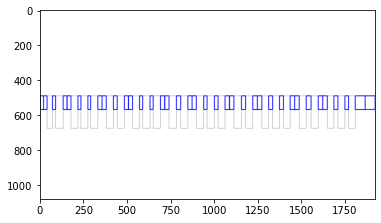

In [88]:

i=0
base=white_resize
while i<len(hakken):
    l=hakken[i][0]
    r=hakken[i][1]
    
    cv2.rectangle(base,
              (l,568),
              (r, 490),
              (0,0,255),
              thickness=3,
              lineType=cv2.LINE_4,
              shift=0)
    i+=1
cv2.imwrite("./after/hakken.jpg",base)
plt.imshow(base)
print(hakken)


In [89]:
#音の高さを検出
n=0 #右から何番目かを入力　左端は0 このプログラムだと0がシ
i=n

nanabit=[]
while i<7+n:
    print(hakken[i+1][0],hakken[i][1])
    if hakken[i+1][0]-hakken[i][1]>1:
        nanabit+=[0]
    else :
        nanabit+=[1]+[1]
        i+=1
    i+=1
if len(nanabit)>7:
    nanabit.pop(-1)
    nanabit[6]=0
print(nanabit)
i=6
tensin=0
k=1
while i>=0:
    tensin+=nanabit[i]*k
    k*=2
    i-=1

print(tensin)

20 20
132 89
155 154
274 234
331 290
[1, 1, 0, 1, 1, 0, 0]
108


In [90]:
if tensin==24:hstart=0
if tensin==51:hstart=1
if tensin==102:hstart=2
if tensin==12:hstart=3
if tensin==27:hstart=4
if tensin==54:hstart=5
if tensin==108:hstart=6
print(hstart)


6


In [91]:
#オクターブ
n=2

In [92]:
i=0
doremi=["C","D","E","F","G","A","B"]
hakkendoremi=[]
while i<len(hakken):
    hakkendoremi+=[str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)]
    i+=1
print(hakkendoremi)

['B2', 'C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4', 'D4', 'E4', 'F4', 'G4', 'A4', 'B4', 'C5', 'D5', 'E5', 'F5', 'G5', 'A5', 'B5', 'C6', 'D6', 'E6', 'F6', 'G6', 'A6', 'B6', 'C7', 'D7', 'E7', 'F7', 'G7', 'A7', 'B7', 'C8']


True

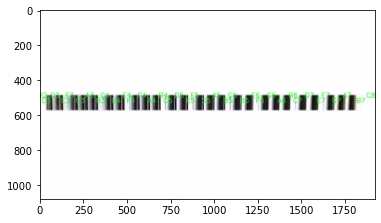

In [93]:
#base2 = cv2.imread("./after/white_resize.jpg")
#base2=im_out
base3=cv2.imread("./after/out.jpg")
plt.imshow(base3)
i=0
while i<len(hakken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(doremi[(hstart+i)%7])+str(math.floor((hstart+i)/7)+n)),
            org=(math.floor((hakken[i][1]+hakken[i][0])/2)-22,500+t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 255, 0),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

In [94]:
if hstart==0 or hstart==6:bstart=0
if hstart==1 :bstart=1
if hstart==2 or hstart==3:bstart=2
if hstart==4 : bstart=3
if hstart==5 : bstart=4
print(hstart,bstart)

6 0


In [95]:
sharp=["C#","D#","F#","G#","A#"]
if hstart==6:
    n+=1
i=0
kokkendoremi=[]
while i<len(kokken):
    kokkendoremi+=[str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)]
    i+=1
print(kokkendoremi)

['C#3', 'D#3', 'F#3', 'G#3', 'A#3', 'C#4', 'D#4', 'F#4', 'G#4', 'A#4', 'C#5', 'D#5', 'F#5', 'G#5', 'A#5', 'C#6', 'D#6', 'F#6', 'G#6', 'A#6', 'C#7', 'D#7', 'F#7', 'G#7', 'A#7']


True

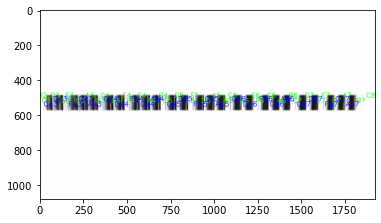

In [96]:
i=0
while i<len(kokken):
    t=i%2*30
    cv2.putText(base3,
            text=(str(sharp[(bstart+i)%5])+str(math.floor((bstart+i)/5)+n)),
            org=(math.floor((kokken[i][1]+kokken[i][0])/2)-35,550-t),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.3,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
    i+=1

plt.imshow(base3)
cv2.imwrite("./after/doremi.jpg",base3)

0 外接矩形の座標
[[1767  570]
 [1772  484]
 [1809  486]
 [1804  573]] 

1 外接矩形の座標
[[1707  572]
 [1710  484]
 [1749  486]
 [1745  573]] 

2 外接矩形の座標
[[1645  570]
 [1647  485]
 [1686  486]
 [1684  571]] 

3 外接矩形の座標
[[1552  570]
 [1554  485]
 [1594  486]
 [1592  571]] 

4 外接矩形の座標
[[1484  570]
 [1486  484]
 [1526  486]
 [1523  572]] 

5 外接矩形の座標
[[1393  570]
 [1395  485]
 [1432  486]
 [1430  571]] 

6 外接矩形の座標
[[1332  571]
 [1334  485]
 [1370  486]
 [1368  572]] 

7 外接矩形の座標
[[1270  572]
 [1271  485]
 [1308  486]
 [1306  572]] 

8 外接矩形の座標
[[1177  571]
 [1179  485]
 [1214  486]
 [1212  572]] 

9 外接矩形の座標
[[1109  571]
 [1110  485]
 [1146  486]
 [1144  572]] 

10 外接矩形の座標
[[1017  570]
 [1019  485]
 [1052  486]
 [1050  571]] 

11 外接矩形の座標
[[956 570]
 [957 485]
 [990 486]
 [988 571]] 

12 外接矩形の座標
[[893 572]
 [895 485]
 [928 486]
 [926 572]] 

13 外接矩形の座標
[[804 486]
 [835 486]
 [835 571]
 [804 571]] 

14 外接矩形の座標
[[738 486]
 [768 486]
 [768 571]
 [738 571]] 

15 外接矩形の座標
[[647 486]
 [676 486]
 [676 571]
 [647 57

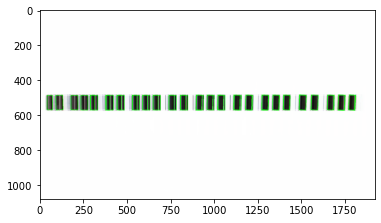

In [97]:
im_mask = cv2.cvtColor(im_mask, cv2.COLOR_BGR2GRAY)
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img_1_gray = cv2.bitwise_or(img_1_gray, im_mask)


# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_1_gray,(9,9)) 
threshold=130

img_blur = img_1_gray
cv2.imwrite("./after/image1.jpg",img_blur)



# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV) 

# img_grayを平均化領域9x9で平均化処理しimg_blurに代入

cv2.imwrite("./after/image2.jpg",img_binary)

# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda x: cv2.contourArea(x) > 2000, contours))


xleft2=[]


ID=0
for i in contours:
    x=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    cv2.imwrite("./after/kagegai"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    
   

    #各輪郭の左端、右端を取得
    for  r in box:
        x+=[r[0]]
    xleft2 +=[min(x)]
    
    ID+=1


In [98]:
#黒鍵検出のとき基準とする影の左端
print(xleft2)




[1767, 1707, 1645, 1552, 1484, 1393, 1332, 1270, 1177, 1109, 1017, 956, 893, 804, 738, 647, 587, 528, 440, 376, 288]


In [99]:
#比較やるよー

In [100]:
img_1 = cv2.imread('./imagefile/tryout/img_000.jpg',1)
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
print(img_1_gray.shape)
img_1 = cv2.bitwise_or(img_1_gray, im_mask)

(1080, 1920)


In [101]:
num=1
nijigen=[]


In [102]:
while(1):
#ここから画像の比較
    img_number=num
    if img_number<100:
        if img_number<10:
            img_number="0"+str(img_number)
        img_number="0"+str(img_number)
    print(num)

#比較したい画像を入力
    img_2_PATH='./imagefile/tryout/img_'+str(img_number)+'.jpg'
    img_2 = cv2.imread(img_2_PATH,1)

    if img_2 is None:
        break

    img_2_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
    #print(img_2_gray.shape)
    img_2 = cv2.bitwise_or(img_2_gray, im_mask)



#画像を引き算
    img_diff = cv2.absdiff(img_1, img_2)

#2値化
    ret2,img_th = cv2.threshold(img_diff,20,255,cv2.THRESH_BINARY)

    #plt.imshow(img_th)

    # アパーチャーサイズ 3, 5, or 7 など 1 より大きい奇数。数値が大きいほどぼかしが出る。
    ksize=3
    #中央値フィルタ
    img_mask = cv2.medianBlur(img_th,ksize)
    # 近傍の定義
    neiborhood = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]],
             np.uint8)

    # 収縮
    #img_mask = cv2.erode(img_th,neiborhood,iterations=6)
    # 膨張
    #img_mask = cv2.dilate(img_mask,neiborhood,iterations=6)


    #plt.imshow(img_mask)
    cv2.imwrite("./after/sa.jpg",img_mask)


#輪郭を検出
    contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = list(filter(lambda x: cv2.contourArea(x) > 400, contours))

    testarray=[]

    #閾値以上の差分を四角で囲う
    for i,cnt in enumerate(contours):
        if width > 50 or height > 50:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(img_1, (x, y), (x+width, y+height), (0, 0, 255), 1)
            #黒鍵検出　元の影よりも重心のx座標が大きいか小さいか
            jyusin = math.floor(x + width / 2)
            #print(jyusin)
            i=1
            numi= xleft2[i]
            numi1=xleft2[i-1]

            while (numi-jyusin)*(numi-jyusin) < (numi1-jyusin)*(numi1-jyusin):
                i=i+1
                numi= xleft2[i]
                numi1=xleft2[i-1]
            if numi1 < jyusin :
                #print("kokken")
                kenshoku = 0

            else :
                if numi1 >= jyusin :
                    #print("hakken")
                    kenshoku = 1

                #else :
                    #print("nothing")
            testarray+=[[jyusin,kenshoku]]
            #print("")

    #plt.imshow(img_1)
    #print(testarray)

    cx=[]
    #cy=[]
    i=0
    while i<len(testarray):
    #M = cv2.moments(cnt)
    #cx = int(M['m10']/M['m00'])
    #cy = int(M['m01']/M['m00'])

        cx += [testarray[i][0]]
    #cy += [500]#(仮)
        i+=1
    #print(cx)

    keyinfo=[]
    j=0
    while j<len(cx):
        i=0
        while hakken[i+1][0]<cx[j]:
            #print(hakkendoremi[i])
            i+=1
        score=str(doremi[(hstart+i)%7]+str(math.floor(i/7)+n))
        #print(score)
        #白鍵と黒鍵の変更
        if testarray[j][1] == 1  or (doremi[(hstart+i)%7]=="E") or (doremi[(hstart+i)%7]=="B"):
            #print(score)
            keyinfo+=[score]
        else :
            if testarray[j][1] == 0 :
                #print(score[:1] + '#' + score[1:])
                keyinfo+=[score[:1] + '#' + score[1:]]
    
        j+=1
    #print(keyinfo)
    
    #01に変換
    bothdoremi=hakkendoremi+kokkendoremi
    #print(bothdoremi)

    output=[]
    i=0
    while i<len(bothdoremi):
        if bothdoremi[i] in keyinfo:
            output+=[1]
        else:
            output+=[0]
        #print(bothdoremi[i],output[i])
        i+=1
    
    #print(output)
    nijigen+=[output]
    num+=1


    




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262


In [103]:
i=0
while i<len(nijigen):
    print(nijigen[i])
    i+=1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0